In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from umap import UMAP
from sklearn.decomposition import PCA

/u/ctser/.conda/envs/ml/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
mean_df = pd.read_csv("mixture_rdkit_mean_definitions_clean.csv")
pna_df = pd.read_csv("mixture_rdkit_definitions_clean.csv")
mix_df = pd.read_csv("mixtures_combined.csv")

# Figure 2

In [17]:
def get_umap(df, metric="euclidean", title_name=""):
    umap_model = UMAP(metric = "jaccard", densmap=True, random_state=42, low_memory = False)
    X_umap = umap_model.fit_transform(list(df[df.columns[2:]].values))
    df["UMAP_0"], df["UMAP_1"] = X_umap[:,0], X_umap[:,1]
    fig, ax = plt.subplots(1,1, figsize=(6,6), dpi=180)
    g = sns.scatterplot(x="UMAP_0", y="UMAP_1", data=df, ax=ax, s=12, alpha=0.5)
    ax.set_title(title_name)
    return df

def get_pca(df, title_name=""):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(list(df[df.columns[2:]].values))
    df["PCA_0"], df["PCA_1"] = X_pca[:,0], X_pca[:,1]
    fig, ax = plt.subplots(1,1, figsize=(6,6), dpi=180)
    g = sns.scatterplot(x="PCA_0", y="PCA_1", data=df, ax=ax, s=12, alpha=0.5)
    ax.set_xlabel(f"PC0 ({pca.explained_variance_ratio_[0]*100:.01f}%)")
    ax.set_ylabel(f"PC1 ({pca.explained_variance_ratio_[1]*100:.01f}%)")
    ax.set_title(title_name)
    return df

/u/ctser/.conda/envs/ml/lib/python3.10/site-packages/umap/umap_.py:1880: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
/u/ctser/.conda/envs/ml/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/u/ctser/.conda/envs/ml/lib/python3.10/site-packages/umap/umap_.py:1880: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
/u/ctser/.conda/envs/ml/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


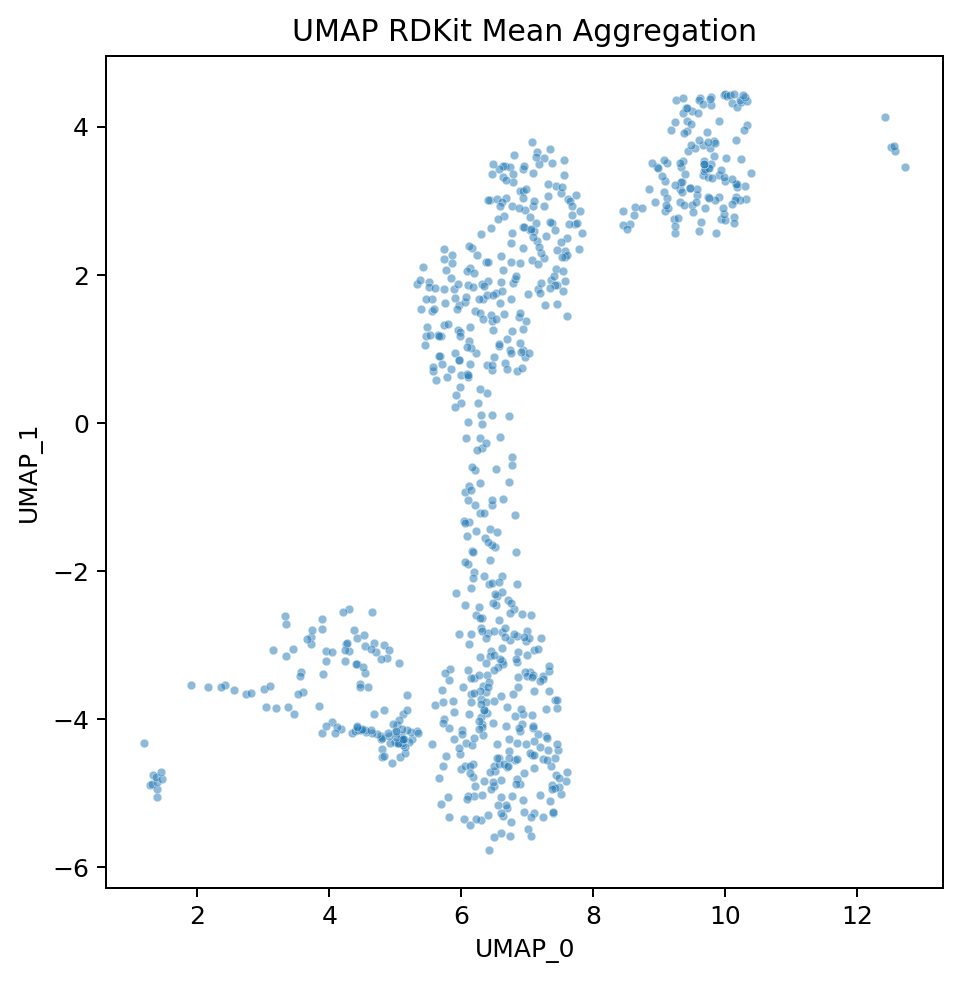

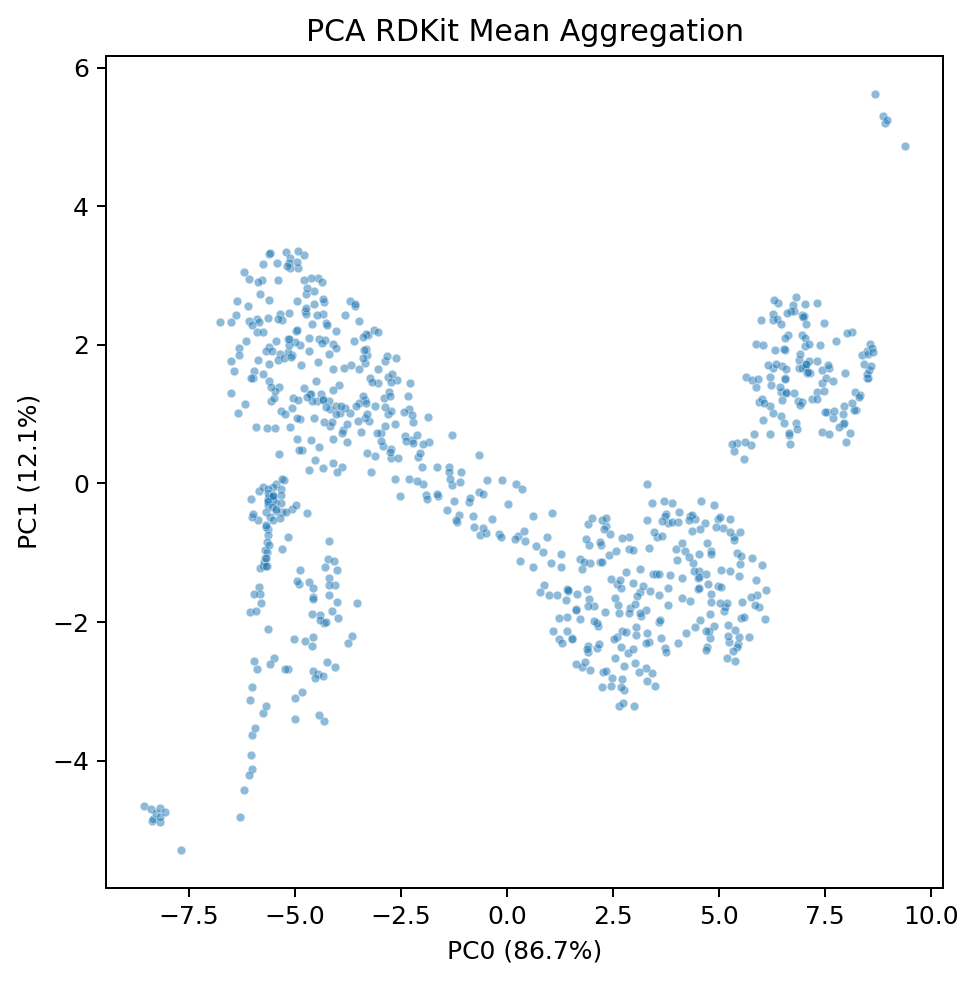

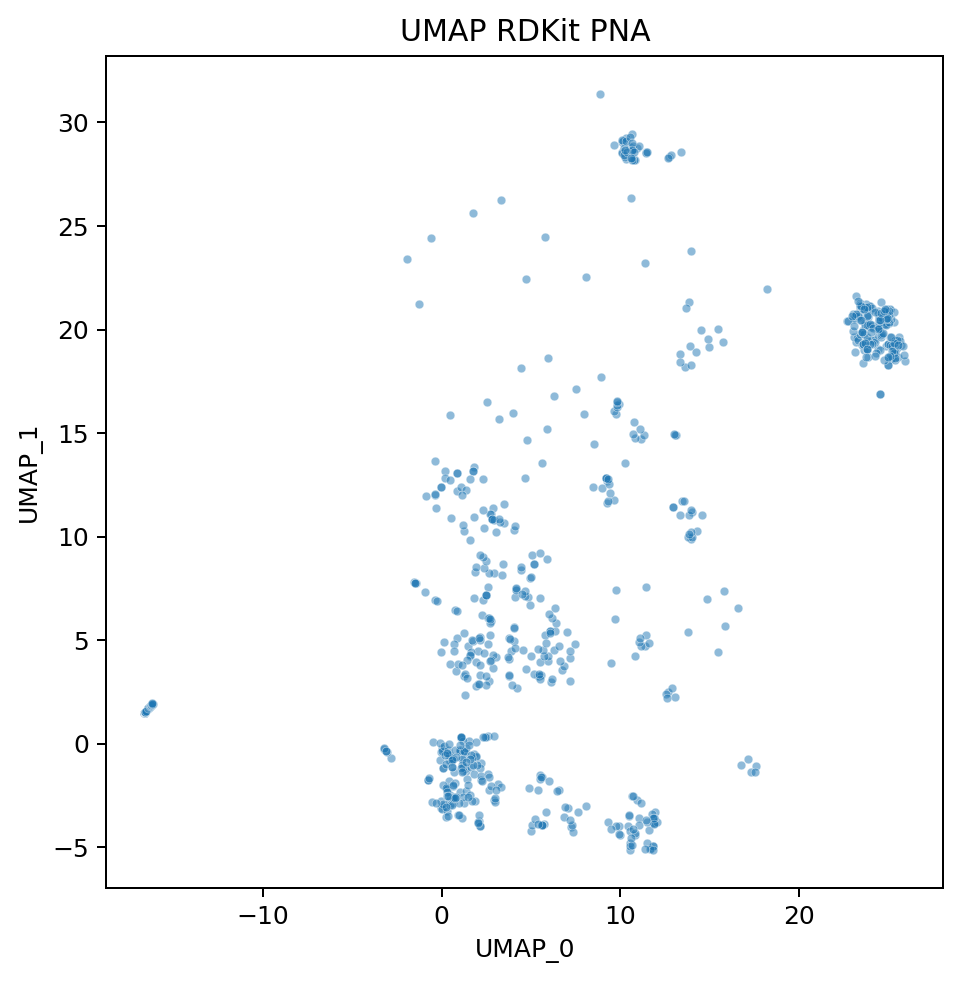

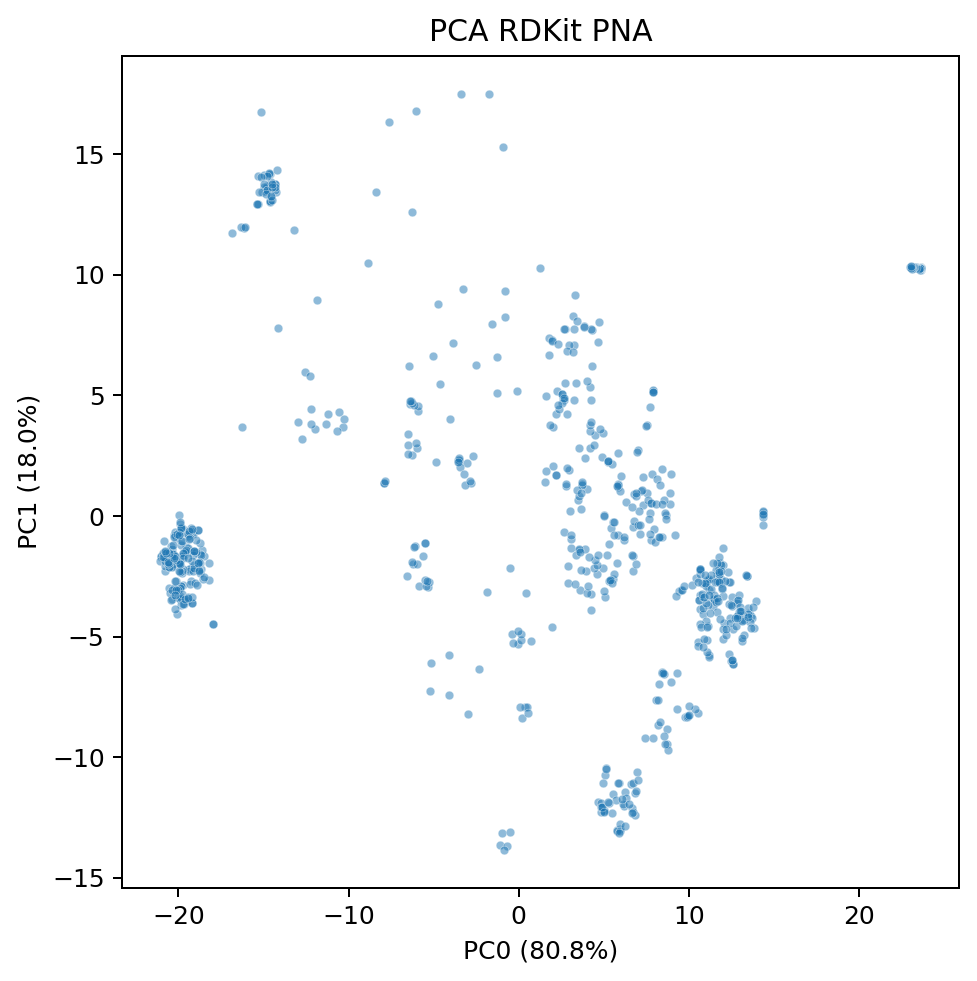

In [20]:
mean_df = get_umap(mean_df, title_name="UMAP RDKit Mean Aggregation")
mean_df = get_pca(mean_df, title_name="PCA RDKit Mean Aggregation")

pna_df = get_umap(pna_df, title_name="UMAP RDKit PNA")
pna_df = get_pca(pna_df, title_name="PCA RDKit PNA")



In [3]:
# Define mix1 as each row's Dataset and Mixture 1 value, and mix2 as Dataset and Mixture 2 value
# Get pna_df.columns[2:] for mix1 and mix2, and calculate the cosine distance between them

def get_aggregate(dataset, mixture_id, df):
    return df[(df["Dataset"] == dataset) & (df["Mixture Label"] == mixture_id)].iloc[0, 2:].to_numpy(dtype="float32")

def get_distance(dataset, mixture1, mixture2, df, distance='cosine'):
    mix1 = get_aggregate(dataset, mixture1, df)
    mix2 = get_aggregate(dataset, mixture2, df)
    return pdist([mix1, mix2], metric=distance)[0]

# Figure 6

In [44]:
mix_df["Mean Cosine Distance"] = mix_df.apply(lambda row: get_distance(row["Dataset"], row["Mixture 1"], row["Mixture 2"], mean_df), axis=1)
mix_df["PNA Cosine Distance"] = mix_df.apply(lambda row: get_distance(row["Dataset"], row["Mixture 1"], row["Mixture 2"], pna_df), axis=1)

Text(0, 0.5, 'Perceptual Similarity')

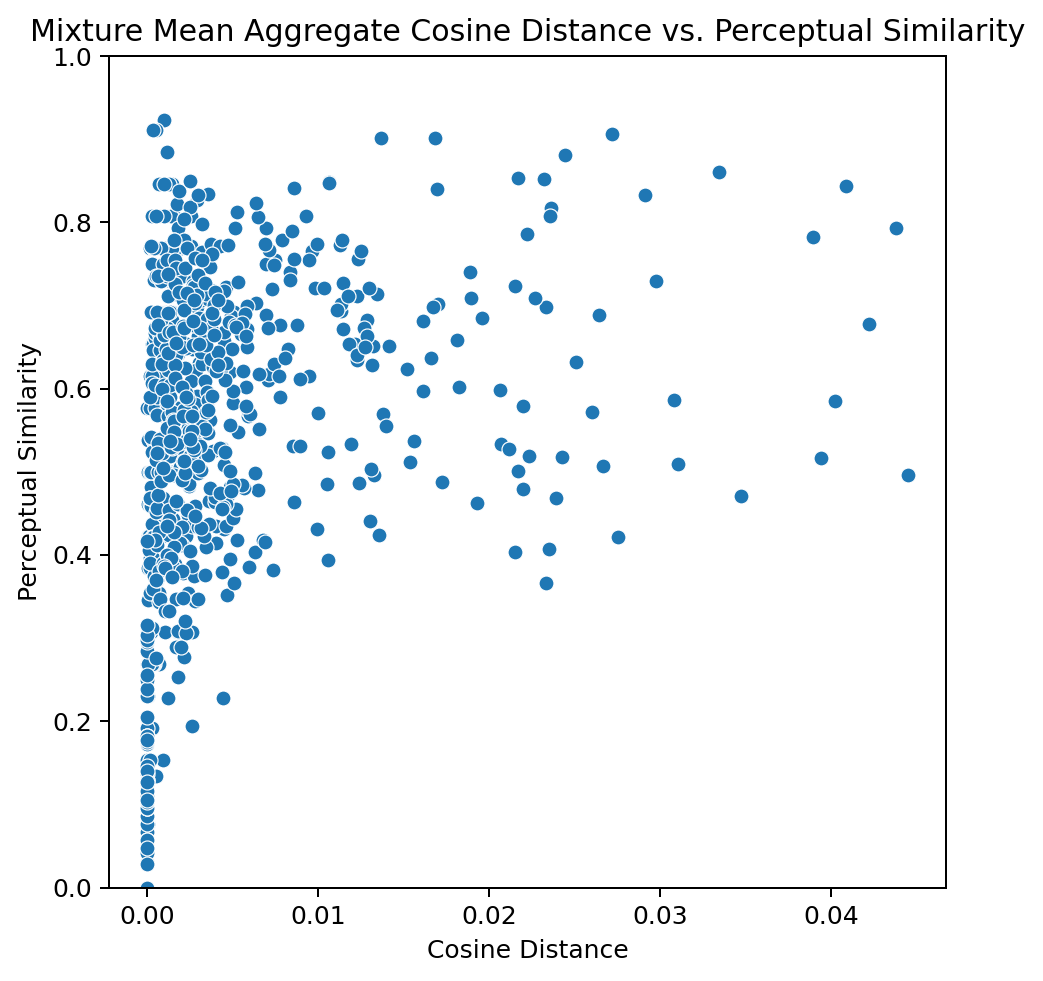

In [47]:
fig, ax = plt.subplots(1,1, figsize=(6,6), dpi=180)

g = sns.scatterplot(x="Mean Cosine Distance", y='Experimental Values', data=mix_df, ax=ax)

ax.set_ylim([0, 1])
ax.set_title("Mixture Mean Aggregate Cosine Distance vs. Perceptual Similarity")
ax.set_xlabel("Cosine Distance")
ax.set_ylabel("Perceptual Similarity")

Text(0, 0.5, 'Perceptual Similarity')

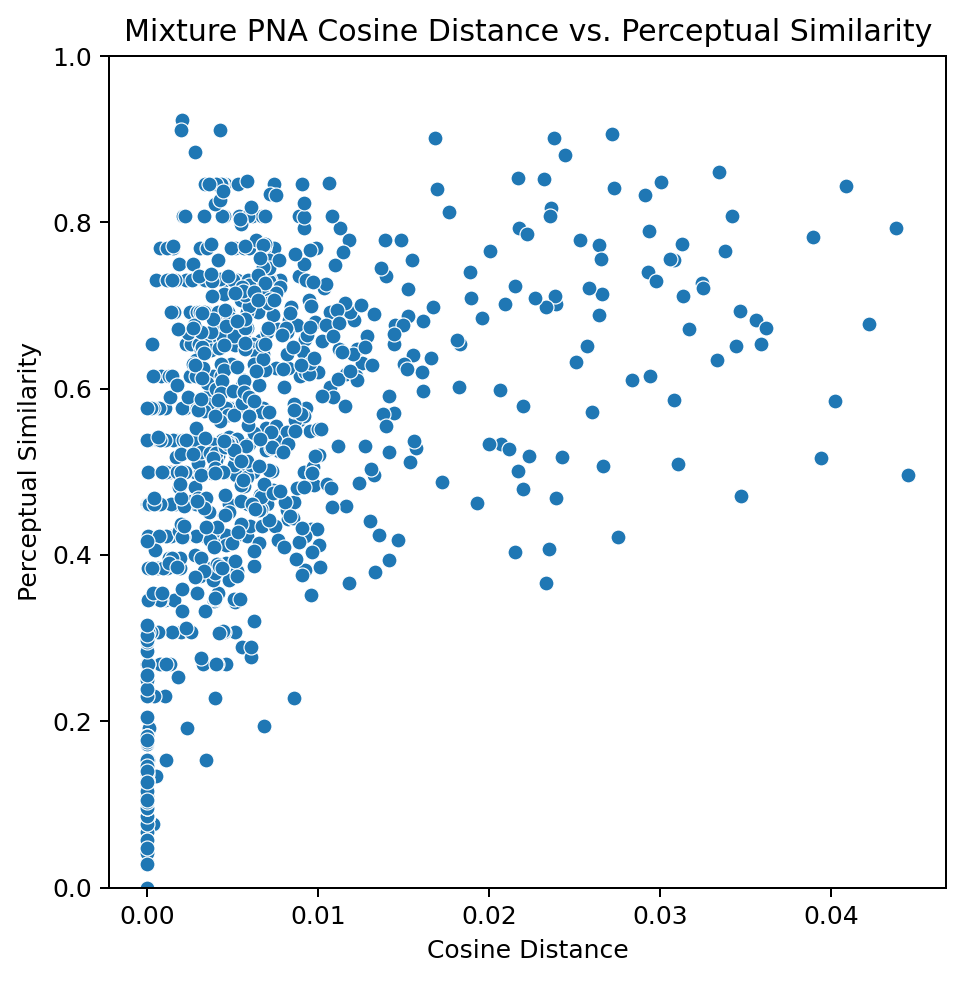

In [48]:
fig, ax = plt.subplots(1,1, figsize=(6,6), dpi=180)

g = sns.scatterplot(x="PNA Cosine Distance", y='Experimental Values', data=mix_df, ax=ax)

ax.set_ylim([0, 1])
ax.set_title("Mixture PNA Cosine Distance vs. Perceptual Similarity")
ax.set_xlabel("Cosine Distance")
ax.set_ylabel("Perceptual Similarity")